In [1]:
from plotnine import *
import folium # 지도 표현을 위해
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['font.family']='NanumGothicCoding'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.dpi']=300
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from mpl_toolkits.mplot3d import Axes3D

Using TensorFlow backend.


In [2]:
### Y 값을 만들어줌

aa= pd.read_csv('../data/dd/과일.csv')
aa = aa[50:]
aab = pd.DataFrame(aa.T)
aab.columns =aab.iloc[0,:]+"-"+aab.iloc[1,:]+"("+aab.iloc[2]+")"
aab1= aab.iloc[:,500:650]
aab1 = aab1.fillna(0)
# aab.drop(aab[aab[]])
aab1 = aab1[3:]
aab1 = aab1['충청북도-수박:면적(ha)']

## 연도별 수박 면적당 생산량을 구함
aab1= aab1[:39].reset_index(drop=True)
aab1 = np.array(aab1)
aab2 = np.array(aab1/100)

In [3]:
# X 값을 만들어줌
# 충청북도의 기후를 구한다.
df_weather = pd.read_csv('../data/dd/날씨통합.csv')
df_weather = df_weather.dropna()
ef_ex = df_weather[df_weather['일시']>='1980-01-01']
ef_ex = ef_ex[ef_ex['지역']=='충청북도'].reset_index(drop=True)


# 평균 기온값 150일치의 온도
mid_temp= ef_ex['평균기온(°C)'].values
mean = mid_temp.mean()
std = mid_temp.std()
kx=[]
for i in range(39):
    xx = mid_temp[365*i:365*i+120]
    kx.append(xx)
# 데이터 전처리
nomalized_data =[]
for window in kx:

    nomalized_window = [(((float(p)-mean) / std)) for p in window]
    nomalized_data.append(nomalized_window)
# kx = np.array(nomalized_data)
kx = nomalized_data
kx

# 평균 상대습도값 150일치의 습도
mid_temp1= ef_ex['평균 상대습도(%)'].values
mean1 = mid_temp.mean()
std1 = mid_temp.std()
kx1=[]
for i in range(39):
    xx = mid_temp1[365*i:365*i+120]
    kx1.append(xx)

# 데이터 전처리
nomalized_data1 =[]
for window in kx1:
    # 첫번째 값을 0으로 설정, 즉 자기 자신/ 자기자신-1=0
    # 두번째 값은 두번째 값/ 첫번째 값 -1 = 결과값
    # 계속 진행하면 결과는 정규화된 값을 얻을 수 있다.
    nomalized_window = [(((float(p)-mean) / std)) for p in window]
    nomalized_data1.append(nomalized_window)
# kx1 = np.array(nomalized_data1)
kx1= nomalized_data1`
kx1

[[6.279728493727168,
  7.668291767825507,
  7.263213000627116,
  4.745103164148639,
  4.285494562904308,
  5.720797694756307,
  3.2065828464239723,
  6.418000572915081,
  6.318678375188553,
  4.542563780549442,
  4.526983827964889,
  6.227146153754302,
  5.5494182163262185,
  5.568893157056911,
  6.260253552996476,
  5.354668809019299,
  4.114115084474218,
  4.786000539683093,
  5.681847813294924,
  5.177446848370001,
  4.591251132376172,
  4.756788128587054,
  6.118086485662425,
  4.965169994405459,
  5.117074532104855,
  4.898955195921105,
  4.908692666286452,
  6.236883624119643,
  7.454067419787894,
  5.224186706123662,
  4.7178382471256715,
  5.1014945795203035,
  6.086926580493319,
  5.991499370912928,
  4.955432524040114,
  5.241714152781285,
  5.161866895785449,
  5.068387180278125,
  5.444253536380482,
  5.296243986827223,
  6.513427782495474,
  5.0898096150818875,
  4.969064982551596,
  3.8219909735138398,
  5.208606753539109,
  5.033332286962881,
  4.094640143743526,
  5.130

In [4]:
# 차원변환
aa =[]
for i in range(39):
    aa.append([kx[i],kx1[i]])

# np.array를 해줌
aa1= np.array(aa)
aa1.shape

# 테스트와 트레이닝 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(aa1,aab2,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape

((31, 2, 120), (8, 2, 120), (31,))

In [5]:
# 케라스 생성 --- 오류 발생점
from keras.layers.core import Flatten
from keras.models import Sequential
model = Sequential()
model.add(Dense(60, input_shape=(2,120,),activation='relu')) 
model.add(Dense(60, activation='relu')) 
model.add(Dense(60, activation='relu')) 
model.add(Dense(60, activation='relu')) 
model.add(Dense(60, activation='relu')) 
model.add(Dense(30, activation='relu')) 
model.add(Flatten())  
model.add(Dense(1, activation='linear')) # 0 아니면 1일 때는 sigmoid 사용
model.compile(optimizer='Adam',loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2, 60)             7260      
_________________________________________________________________
dense_2 (Dense)              (None, 2, 60)             3660      
_________________________________________________________________
dense_3 (Dense)              (None, 2, 60)             3660      
_________________________________________________________________
dense_4 (Dense)              (None, 2, 60)             3660      
_________________________________________________________________
dense_5 (Dense)              (None, 2, 60)             3660      
_________________________________________________________________
dense_6 (Dense)              (None, 2, 30)             1830      
_________________________________________________________________
flatten_1 (Flatten)          (None, 60)               

In [6]:
# 모델 훈련
hist = model.fit(X_train,y_train, epochs=1000, validation_data=(X_test, y_test))


Train on 31 samples, validate on 8 samples
Epoch 1/1000
31/31 [==============================] - 0s 16ms/step - loss: 312.8236 - accuracy: 0.0000e+00 - val_loss: 301.6720 - val_accuracy: 0.0000e+00
Epoch 2/1000
31/31 [==============================] - 0s 161us/step - loss: 296.9154 - accuracy: 0.0000e+00 - val_loss: 292.5389 - val_accuracy: 0.0000e+00
Epoch 3/1000
31/31 [==============================] - 0s 129us/step - loss: 287.1756 - accuracy: 0.0000e+00 - val_loss: 284.4760 - val_accuracy: 0.0000e+00
Epoch 4/1000
31/31 [==============================] - 0s 193us/step - loss: 278.7788 - accuracy: 0.0000e+00 - val_loss: 274.6129 - val_accuracy: 0.0000e+00
Epoch 5/1000
31/31 [==============================] - 0s 161us/step - loss: 268.7392 - accuracy: 0.0000e+00 - val_loss: 261.2140 - val_accuracy: 0.0000e+00
Epoch 6/1000
31/31 [==============================] - 0s 129us/step - loss: 255.2051 - accuracy: 0.0000e+00 - val_loss: 245.5443 - val_accuracy: 0.0000e+00
Epoch 7/1000
31/31 [=

Epoch 53/1000
31/31 [==============================] - 0s 97us/step - loss: 37.9578 - accuracy: 0.0000e+00 - val_loss: 34.0547 - val_accuracy: 0.0000e+00
Epoch 54/1000
31/31 [==============================] - 0s 129us/step - loss: 37.9304 - accuracy: 0.0000e+00 - val_loss: 33.9695 - val_accuracy: 0.0000e+00
Epoch 55/1000
31/31 [==============================] - 0s 96us/step - loss: 37.7221 - accuracy: 0.0000e+00 - val_loss: 33.5945 - val_accuracy: 0.0000e+00
Epoch 56/1000
31/31 [==============================] - 0s 161us/step - loss: 37.3569 - accuracy: 0.0000e+00 - val_loss: 33.0231 - val_accuracy: 0.0000e+00
Epoch 57/1000
31/31 [==============================] - 0s 129us/step - loss: 36.9153 - accuracy: 0.0000e+00 - val_loss: 32.4124 - val_accuracy: 0.0000e+00
Epoch 58/1000
31/31 [==============================] - 0s 354us/step - loss: 36.5227 - accuracy: 0.0000e+00 - val_loss: 31.8382 - val_accuracy: 0.0000e+00
Epoch 59/1000
31/31 [==============================] - 0s 129us/step - l

Epoch 106/1000
31/31 [==============================] - 0s 97us/step - loss: 16.1491 - accuracy: 0.0000e+00 - val_loss: 28.1718 - val_accuracy: 0.0000e+00
Epoch 107/1000
31/31 [==============================] - 0s 129us/step - loss: 15.4223 - accuracy: 0.0000e+00 - val_loss: 28.2365 - val_accuracy: 0.0000e+00
Epoch 108/1000
31/31 [==============================] - 0s 96us/step - loss: 14.6698 - accuracy: 0.0000e+00 - val_loss: 28.3657 - val_accuracy: 0.0000e+00
Epoch 109/1000
31/31 [==============================] - 0s 96us/step - loss: 13.9427 - accuracy: 0.0000e+00 - val_loss: 28.5902 - val_accuracy: 0.0000e+00
Epoch 110/1000
31/31 [==============================] - 0s 129us/step - loss: 13.2371 - accuracy: 0.0000e+00 - val_loss: 28.8779 - val_accuracy: 0.0000e+00
Epoch 111/1000
31/31 [==============================] - 0s 96us/step - loss: 12.5558 - accuracy: 0.0000e+00 - val_loss: 29.2306 - val_accuracy: 0.0000e+00
Epoch 112/1000
31/31 [==============================] - 0s 97us/step

Epoch 159/1000
31/31 [==============================] - 0s 129us/step - loss: 0.0777 - accuracy: 0.0000e+00 - val_loss: 32.9681 - val_accuracy: 0.0000e+00
Epoch 160/1000
31/31 [==============================] - 0s 933us/step - loss: 0.1599 - accuracy: 0.0000e+00 - val_loss: 33.5954 - val_accuracy: 0.0000e+00
Epoch 161/1000
31/31 [==============================] - 0s 129us/step - loss: 0.1631 - accuracy: 0.0000e+00 - val_loss: 33.1175 - val_accuracy: 0.0000e+00
Epoch 162/1000
31/31 [==============================] - 0s 97us/step - loss: 0.0584 - accuracy: 0.0000e+00 - val_loss: 32.9711 - val_accuracy: 0.0000e+00
Epoch 163/1000
31/31 [==============================] - 0s 97us/step - loss: 0.1024 - accuracy: 0.0000e+00 - val_loss: 33.5467 - val_accuracy: 0.0000e+00
Epoch 164/1000
31/31 [==============================] - 0s 129us/step - loss: 0.1263 - accuracy: 0.0000e+00 - val_loss: 33.1213 - val_accuracy: 0.0000e+00
Epoch 165/1000
31/31 [==============================] - 0s 97us/step - l

Epoch 212/1000
31/31 [==============================] - 0s 129us/step - loss: 7.6365e-04 - accuracy: 0.0000e+00 - val_loss: 33.1814 - val_accuracy: 0.0000e+00
Epoch 213/1000
31/31 [==============================] - 0s 161us/step - loss: 2.5735e-04 - accuracy: 0.0000e+00 - val_loss: 33.1775 - val_accuracy: 0.0000e+00
Epoch 214/1000
31/31 [==============================] - 0s 96us/step - loss: 1.2263e-04 - accuracy: 0.0000e+00 - val_loss: 33.1546 - val_accuracy: 0.0000e+00
Epoch 215/1000
31/31 [==============================] - 0s 161us/step - loss: 5.0118e-04 - accuracy: 0.0000e+00 - val_loss: 33.1941 - val_accuracy: 0.0000e+00
Epoch 216/1000
31/31 [==============================] - 0s 129us/step - loss: 4.4838e-04 - accuracy: 0.0000e+00 - val_loss: 33.1730 - val_accuracy: 0.0000e+00
Epoch 217/1000
31/31 [==============================] - 0s 96us/step - loss: 9.4720e-05 - accuracy: 0.0000e+00 - val_loss: 33.1720 - val_accuracy: 0.0000e+00
Epoch 218/1000
31/31 [==========================

Epoch 264/1000
31/31 [==============================] - 0s 97us/step - loss: 2.0660e-06 - accuracy: 0.0000e+00 - val_loss: 33.1903 - val_accuracy: 0.0000e+00
Epoch 265/1000
31/31 [==============================] - 0s 97us/step - loss: 4.1540e-06 - accuracy: 0.0000e+00 - val_loss: 33.1865 - val_accuracy: 0.0000e+00
Epoch 266/1000
31/31 [==============================] - 0s 225us/step - loss: 4.7051e-06 - accuracy: 0.0000e+00 - val_loss: 33.1898 - val_accuracy: 0.0000e+00
Epoch 267/1000
31/31 [==============================] - 0s 161us/step - loss: 3.2784e-06 - accuracy: 0.0000e+00 - val_loss: 33.1873 - val_accuracy: 0.0000e+00
Epoch 268/1000
31/31 [==============================] - 0s 161us/step - loss: 1.2870e-06 - accuracy: 0.0000e+00 - val_loss: 33.1881 - val_accuracy: 0.0000e+00
Epoch 269/1000
31/31 [==============================] - 0s 129us/step - loss: 3.0841e-07 - accuracy: 0.0000e+00 - val_loss: 33.1886 - val_accuracy: 0.0000e+00
Epoch 270/1000
31/31 [==========================

Epoch 316/1000
31/31 [==============================] - 0s 97us/step - loss: 7.3819e-05 - accuracy: 0.0000e+00 - val_loss: 33.1975 - val_accuracy: 0.0000e+00
Epoch 317/1000
31/31 [==============================] - 0s 161us/step - loss: 1.3656e-04 - accuracy: 0.0000e+00 - val_loss: 33.1724 - val_accuracy: 0.0000e+00
Epoch 318/1000
31/31 [==============================] - 0s 96us/step - loss: 2.5843e-04 - accuracy: 0.0000e+00 - val_loss: 33.2074 - val_accuracy: 0.0000e+00
Epoch 319/1000
31/31 [==============================] - 0s 161us/step - loss: 4.9540e-04 - accuracy: 0.0000e+00 - val_loss: 33.1590 - val_accuracy: 0.0000e+00
Epoch 320/1000
31/31 [==============================] - 0s 96us/step - loss: 9.7453e-04 - accuracy: 0.0000e+00 - val_loss: 33.2286 - val_accuracy: 0.0000e+00
Epoch 321/1000
31/31 [==============================] - 0s 129us/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 33.1321 - val_accuracy: 0.0000e+00
Epoch 322/1000
31/31 [==============================]

Epoch 369/1000
31/31 [==============================] - 0s 161us/step - loss: 0.0058 - accuracy: 0.0000e+00 - val_loss: 32.8028 - val_accuracy: 0.0000e+00
Epoch 370/1000
31/31 [==============================] - 0s 161us/step - loss: 4.8838e-04 - accuracy: 0.0000e+00 - val_loss: 32.7884 - val_accuracy: 0.0000e+00
Epoch 371/1000
31/31 [==============================] - 0s 96us/step - loss: 0.0019 - accuracy: 0.0000e+00 - val_loss: 32.9014 - val_accuracy: 0.0000e+00
Epoch 372/1000
31/31 [==============================] - 0s 161us/step - loss: 0.0052 - accuracy: 0.0000e+00 - val_loss: 32.7940 - val_accuracy: 0.0000e+00
Epoch 373/1000
31/31 [==============================] - 0s 129us/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 32.8456 - val_accuracy: 0.0000e+00
Epoch 374/1000
31/31 [==============================] - 0s 97us/step - loss: 6.7590e-05 - accuracy: 0.0000e+00 - val_loss: 32.8983 - val_accuracy: 0.0000e+00
Epoch 375/1000
31/31 [==============================] - 0s 225us

Epoch 421/1000
31/31 [==============================] - 0s 129us/step - loss: 3.7400e-05 - accuracy: 0.0000e+00 - val_loss: 32.8718 - val_accuracy: 0.0000e+00
Epoch 422/1000
31/31 [==============================] - 0s 129us/step - loss: 2.4854e-05 - accuracy: 0.0000e+00 - val_loss: 32.8657 - val_accuracy: 0.0000e+00
Epoch 423/1000
31/31 [==============================] - 0s 161us/step - loss: 3.6575e-06 - accuracy: 0.0000e+00 - val_loss: 32.8659 - val_accuracy: 0.0000e+00
Epoch 424/1000
31/31 [==============================] - 0s 129us/step - loss: 3.0578e-06 - accuracy: 0.0000e+00 - val_loss: 32.8714 - val_accuracy: 0.0000e+00
Epoch 425/1000
31/31 [==============================] - 0s 129us/step - loss: 1.8025e-05 - accuracy: 0.0000e+00 - val_loss: 32.8632 - val_accuracy: 0.0000e+00
Epoch 426/1000
31/31 [==============================] - 0s 129us/step - loss: 2.3295e-05 - accuracy: 0.0000e+00 - val_loss: 32.8706 - val_accuracy: 0.0000e+00
Epoch 427/1000
31/31 [========================

Epoch 473/1000
31/31 [==============================] - 0s 129us/step - loss: 1.7129e-07 - accuracy: 0.0000e+00 - val_loss: 32.8663 - val_accuracy: 0.0000e+00
Epoch 474/1000
31/31 [==============================] - 0s 129us/step - loss: 5.9927e-08 - accuracy: 0.0000e+00 - val_loss: 32.8666 - val_accuracy: 0.0000e+00
Epoch 475/1000
31/31 [==============================] - 0s 161us/step - loss: 3.4609e-09 - accuracy: 0.0000e+00 - val_loss: 32.8667 - val_accuracy: 0.0000e+00
Epoch 476/1000
31/31 [==============================] - 0s 96us/step - loss: 1.8286e-08 - accuracy: 0.0000e+00 - val_loss: 32.8664 - val_accuracy: 0.0000e+00
Epoch 477/1000
31/31 [==============================] - 0s 161us/step - loss: 7.5277e-08 - accuracy: 0.0000e+00 - val_loss: 32.8670 - val_accuracy: 0.0000e+00
Epoch 478/1000
31/31 [==============================] - 0s 129us/step - loss: 1.3109e-07 - accuracy: 0.0000e+00 - val_loss: 32.8663 - val_accuracy: 0.0000e+00
Epoch 479/1000
31/31 [=========================

Epoch 525/1000
31/31 [==============================] - 0s 161us/step - loss: 1.2921e-06 - accuracy: 0.0000e+00 - val_loss: 32.8652 - val_accuracy: 0.0000e+00
Epoch 526/1000
31/31 [==============================] - 0s 129us/step - loss: 2.0370e-06 - accuracy: 0.0000e+00 - val_loss: 32.8681 - val_accuracy: 0.0000e+00
Epoch 527/1000
31/31 [==============================] - 0s 96us/step - loss: 3.2824e-06 - accuracy: 0.0000e+00 - val_loss: 32.8644 - val_accuracy: 0.0000e+00
Epoch 528/1000
31/31 [==============================] - 0s 257us/step - loss: 5.3994e-06 - accuracy: 0.0000e+00 - val_loss: 32.8692 - val_accuracy: 0.0000e+00
Epoch 529/1000
31/31 [==============================] - 0s 161us/step - loss: 9.0292e-06 - accuracy: 0.0000e+00 - val_loss: 32.8629 - val_accuracy: 0.0000e+00
Epoch 530/1000
31/31 [==============================] - 0s 129us/step - loss: 1.5348e-05 - accuracy: 0.0000e+00 - val_loss: 32.8712 - val_accuracy: 0.0000e+00
Epoch 531/1000
31/31 [=========================

Epoch 578/1000
31/31 [==============================] - 0s 161us/step - loss: 0.0419 - accuracy: 0.0000e+00 - val_loss: 33.4284 - val_accuracy: 0.0000e+00
Epoch 579/1000
31/31 [==============================] - 0s 97us/step - loss: 0.0403 - accuracy: 0.0000e+00 - val_loss: 33.5619 - val_accuracy: 0.0000e+00
Epoch 580/1000
31/31 [==============================] - 0s 129us/step - loss: 0.0053 - accuracy: 0.0000e+00 - val_loss: 33.9260 - val_accuracy: 0.0000e+00
Epoch 581/1000
31/31 [==============================] - 0s 129us/step - loss: 0.0443 - accuracy: 0.0000e+00 - val_loss: 33.5846 - val_accuracy: 0.0000e+00
Epoch 582/1000
31/31 [==============================] - 0s 129us/step - loss: 0.0082 - accuracy: 0.0000e+00 - val_loss: 33.5639 - val_accuracy: 0.0000e+00
Epoch 583/1000
31/31 [==============================] - 0s 129us/step - loss: 0.0190 - accuracy: 0.0000e+00 - val_loss: 33.9109 - val_accuracy: 0.0000e+00
Epoch 584/1000
31/31 [==============================] - 0s 129us/step -

Epoch 631/1000
31/31 [==============================] - 0s 418us/step - loss: 1.2880e-04 - accuracy: 0.0000e+00 - val_loss: 33.7459 - val_accuracy: 0.0000e+00
Epoch 632/1000
31/31 [==============================] - 0s 193us/step - loss: 4.0835e-05 - accuracy: 0.0000e+00 - val_loss: 33.7704 - val_accuracy: 0.0000e+00
Epoch 633/1000
31/31 [==============================] - 0s 129us/step - loss: 1.9820e-04 - accuracy: 0.0000e+00 - val_loss: 33.7500 - val_accuracy: 0.0000e+00
Epoch 634/1000
31/31 [==============================] - 0s 161us/step - loss: 3.0822e-05 - accuracy: 0.0000e+00 - val_loss: 33.7475 - val_accuracy: 0.0000e+00
Epoch 635/1000
31/31 [==============================] - 0s 129us/step - loss: 7.9532e-05 - accuracy: 0.0000e+00 - val_loss: 33.7720 - val_accuracy: 0.0000e+00
Epoch 636/1000
31/31 [==============================] - 0s 129us/step - loss: 1.2369e-04 - accuracy: 0.0000e+00 - val_loss: 33.7607 - val_accuracy: 0.0000e+00
Epoch 637/1000
31/31 [========================

Epoch 683/1000
31/31 [==============================] - 0s 96us/step - loss: 1.0047e-06 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 684/1000
31/31 [==============================] - 0s 129us/step - loss: 5.9491e-08 - accuracy: 0.0000e+00 - val_loss: 33.7605 - val_accuracy: 0.0000e+00
Epoch 685/1000
31/31 [==============================] - 0s 161us/step - loss: 5.8416e-07 - accuracy: 0.0000e+00 - val_loss: 33.7622 - val_accuracy: 0.0000e+00
Epoch 686/1000
31/31 [==============================] - 0s 97us/step - loss: 6.4053e-07 - accuracy: 0.0000e+00 - val_loss: 33.7612 - val_accuracy: 0.0000e+00
Epoch 687/1000
31/31 [==============================] - 0s 193us/step - loss: 1.2639e-08 - accuracy: 0.0000e+00 - val_loss: 33.7604 - val_accuracy: 0.0000e+00
Epoch 688/1000
31/31 [==============================] - 0s 97us/step - loss: 5.0708e-07 - accuracy: 0.0000e+00 - val_loss: 33.7619 - val_accuracy: 0.0000e+00
Epoch 689/1000
31/31 [===========================

Epoch 735/1000
31/31 [==============================] - 0s 193us/step - loss: 1.1473e-09 - accuracy: 0.0000e+00 - val_loss: 33.7613 - val_accuracy: 0.0000e+00
Epoch 736/1000
31/31 [==============================] - 0s 161us/step - loss: 8.4335e-09 - accuracy: 0.0000e+00 - val_loss: 33.7615 - val_accuracy: 0.0000e+00
Epoch 737/1000
31/31 [==============================] - 0s 129us/step - loss: 4.5496e-09 - accuracy: 0.0000e+00 - val_loss: 33.7615 - val_accuracy: 0.0000e+00
Epoch 738/1000
31/31 [==============================] - 0s 129us/step - loss: 2.7242e-10 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 739/1000
31/31 [==============================] - 0s 97us/step - loss: 5.4343e-09 - accuracy: 0.0000e+00 - val_loss: 33.7615 - val_accuracy: 0.0000e+00
Epoch 740/1000
31/31 [==============================] - 0s 129us/step - loss: 3.9462e-09 - accuracy: 0.0000e+00 - val_loss: 33.7615 - val_accuracy: 0.0000e+00
Epoch 741/1000
31/31 [=========================

Epoch 787/1000
31/31 [==============================] - 0s 96us/step - loss: 2.6582e-10 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 788/1000
31/31 [==============================] - 0s 129us/step - loss: 5.8310e-12 - accuracy: 0.0000e+00 - val_loss: 33.7615 - val_accuracy: 0.0000e+00
Epoch 789/1000
31/31 [==============================] - 0s 129us/step - loss: 2.2457e-10 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 790/1000
31/31 [==============================] - 0s 161us/step - loss: 2.6331e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 791/1000
31/31 [==============================] - 0s 97us/step - loss: 1.5246e-10 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 792/1000
31/31 [==============================] - 0s 129us/step - loss: 1.5674e-11 - accuracy: 0.0000e+00 - val_loss: 33.7615 - val_accuracy: 0.0000e+00
Epoch 793/1000
31/31 [==========================

Epoch 839/1000
31/31 [==============================] - 0s 97us/step - loss: 9.4177e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 840/1000
31/31 [==============================] - 0s 129us/step - loss: 1.3166e-11 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 841/1000
31/31 [==============================] - 0s 193us/step - loss: 5.8457e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 842/1000
31/31 [==============================] - 0s 129us/step - loss: 6.1684e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 843/1000
31/31 [==============================] - 0s 129us/step - loss: 7.2393e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 844/1000
31/31 [==============================] - 0s 96us/step - loss: 5.7430e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 845/1000
31/31 [==========================

Epoch 891/1000
31/31 [==============================] - 0s 129us/step - loss: 1.2762e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 892/1000
31/31 [==============================] - 0s 129us/step - loss: 1.3056e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 893/1000
31/31 [==============================] - 0s 129us/step - loss: 1.1075e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 894/1000
31/31 [==============================] - 0s 129us/step - loss: 1.2689e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 895/1000
31/31 [==============================] - 0s 161us/step - loss: 9.5350e-13 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 896/1000
31/31 [==============================] - 0s 161us/step - loss: 1.3349e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 897/1000
31/31 [========================

Epoch 943/1000
31/31 [==============================] - 0s 129us/step - loss: 1.0929e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 944/1000
31/31 [==============================] - 0s 96us/step - loss: 1.2175e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 945/1000
31/31 [==============================] - 0s 129us/step - loss: 2.1784e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 946/1000
31/31 [==============================] - 0s 129us/step - loss: 1.1882e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 947/1000
31/31 [==============================] - 0s 97us/step - loss: 1.7383e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 948/1000
31/31 [==============================] - 0s 96us/step - loss: 1.7383e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 949/1000
31/31 [===========================

Epoch 995/1000
31/31 [==============================] - 0s 129us/step - loss: 1.1295e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 996/1000
31/31 [==============================] - 0s 129us/step - loss: 2.0610e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 997/1000
31/31 [==============================] - 0s 97us/step - loss: 1.8997e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 998/1000
31/31 [==============================] - 0s 161us/step - loss: 1.1222e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 999/1000
31/31 [==============================] - 0s 129us/step - loss: 9.0949e-13 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00
Epoch 1000/1000
31/31 [==============================] - 0s 97us/step - loss: 1.0048e-12 - accuracy: 0.0000e+00 - val_loss: 33.7614 - val_accuracy: 0.0000e+00


In [7]:
pred = model.predict(X_test)

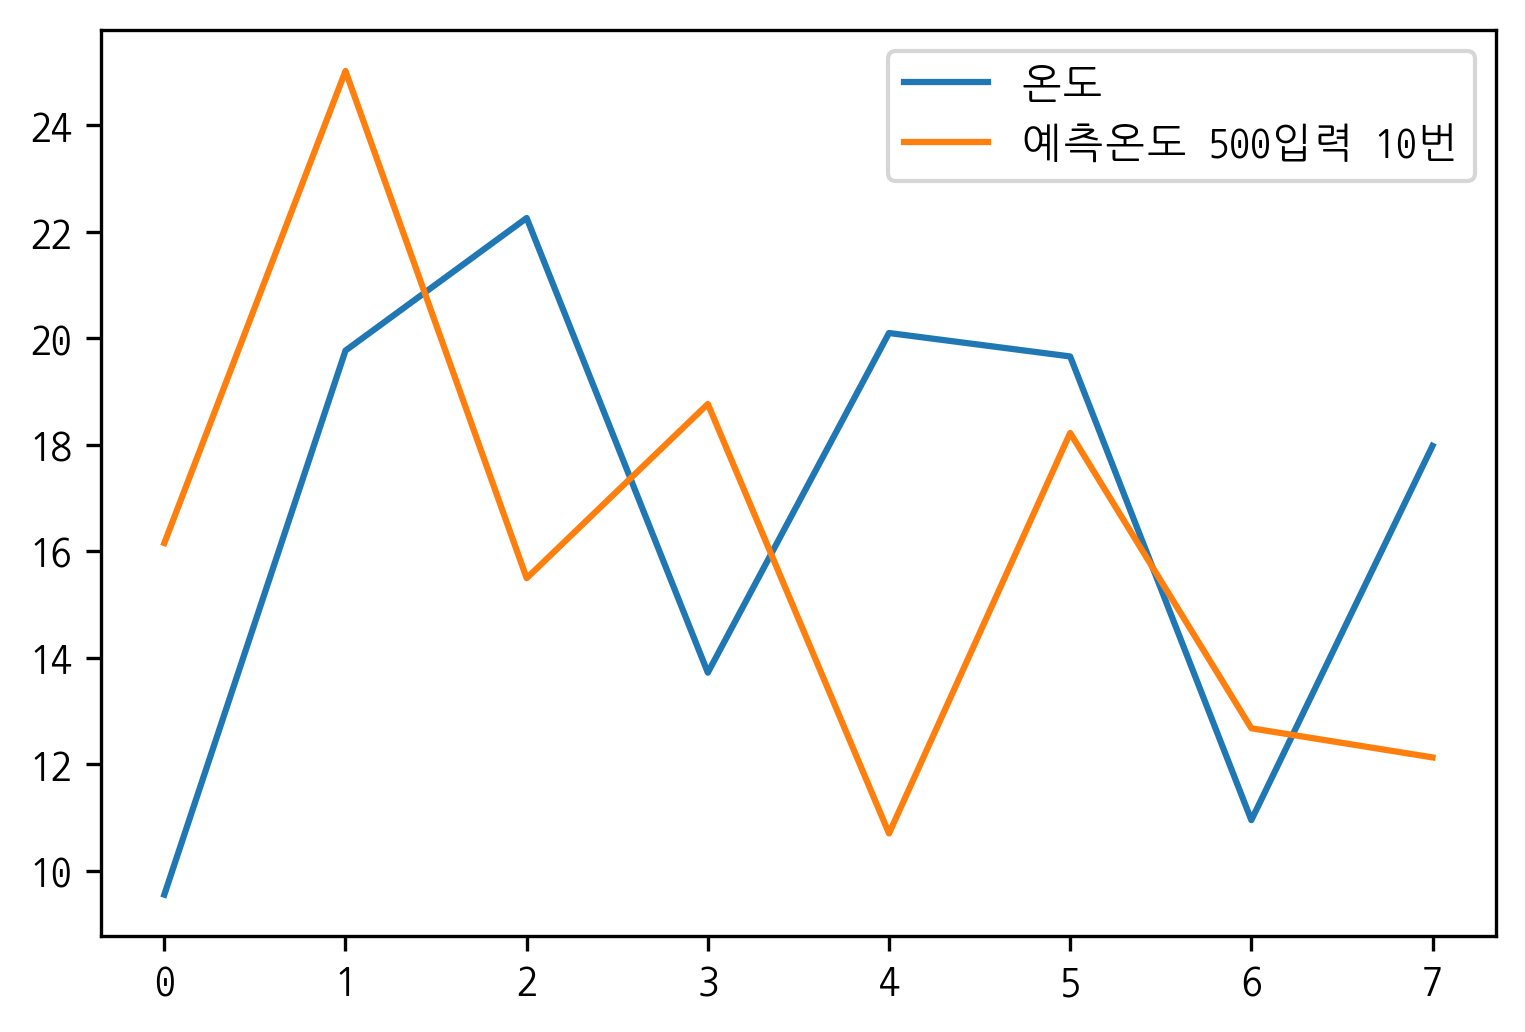

In [8]:
fig = plt.figure()
ax=fig.add_subplot(111)
ax.plot(y_test[:8],label='온도')
ax.plot(pred[:8],label="예측온도 500입력 10번")
plt.legend()
plt.show()

In [9]:
df_weather = pd.read_csv('../data/dd/날씨통합.csv')
df_weather.shape

(289032, 15)

Index(['Unnamed: 0', '지역', '일시', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)',
       '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)', '평균 해면기압(hPa)', '합계 일조시간(hr)',
       '평균 전운량(1/10)', '연도', '연월', '월'],
      dtype='object')